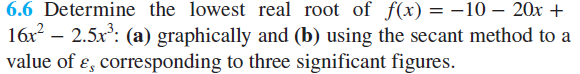

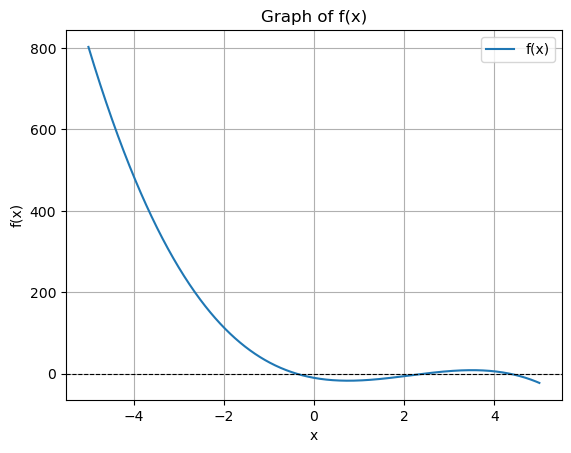

Lowest root: -0.378568 found in 7 iterations


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return -10 - 20*x + 16*x**2 - 2.5*x**3

# (a) Plot the function to estimate the root location
x = np.linspace(-5, 5, 1000)  # Fine range of x values
y = f(x)

plt.figure()
plt.plot(x, y, label="f(x)")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title("Graph of f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.show()

# (b) Secant Method implementation
def secant_method(f, x0, x1, tol=0.0005, max_iter=100):
    iteration = 0
    while iteration < max_iter:
        # Secant formula
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        ea = abs((x2 - x1) / x2) * 100  # Approximate relative error
        if ea < tol:  # Check if error tolerance is met
            break
        x0, x1 = x1, x2  # Update guesses
        iteration += 1
    return x2, iteration

# Initial guesses (based on graphical observation)
x0, x1 = -3, -2  # Adjust these based on the plot
root, iters = secant_method(f, x0, x1)

print(f"Lowest root: {root:.6f} found in {iters} iterations")


In [3]:
from scipy.optimize import newton, bisect, root, fsolve
import numpy as np

# Define the function
def f(x):
    return -10 - 20*x + 16*x**2 - 2.5*x**3

# Define its derivative for methods that require it
def df(x):
    return -20 + 32*x - 7.5*x**2

# Safeguard for scipy.optimize.newton: Ensure df(x) does not become zero at x0
try:
    newton_result = newton(f, x0=-3, fprime=df)
except RuntimeError as e:
    newton_result = f"Newton method failed: {e}"

# Using scipy.optimize.bisect (requires interval where the function changes sign)
try:
    bisect_result = bisect(f, -3, -2)
except ValueError as e:
    bisect_result = f"Bisection method failed: {e}"

# Using scipy.optimize.root (generic solver, works for multi-dimensional functions too)
root_result = root(f, x0=-3)

if root_result.success:
    root_result_value = root_result.x[0]
else:
    root_result_value = f"Root method failed: {root_result.message}"

# Using scipy.optimize.fsolve (another generic solver)
try:
    fsolve_result = fsolve(f, x0=-3)[0]
except Exception as e:
    fsolve_result = f"fsolve method failed: {e}"

# Display results
print("Newton-Raphson Result:", newton_result)
print("Bisection Result:", bisect_result)
print("Root Finder Result:", root_result_value)
print("fsolve Result:", fsolve_result)


Newton-Raphson Result: -0.37856755795859964
Bisection Result: Bisection method failed: f(a) and f(b) must have different signs
Root Finder Result: -0.37856755795859987
fsolve Result: -0.37856755795859987


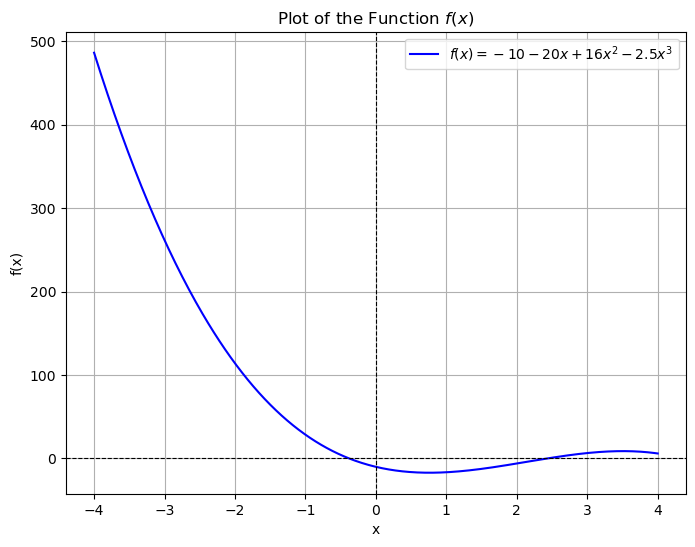

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return -10 - 20*x + 16*x**2 - 2.5*x**3

# Generate x values over a range
x = np.linspace(-4, 4, 500)  # Adjust range and number of points as needed

# Calculate corresponding y values
y = f(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r"$f(x) = -10 - 20x + 16x^2 - 2.5x^3$", color='blue')

# Add grid, labels, and title
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # x-axis
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # y-axis
plt.title("Plot of the Function $f(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc="best")
plt.grid(True)

# Show the plot
plt.show()


In [5]:
import numpy as np

# Define the function
def f(x):
    return -10 - 20*x + 16*x**2 - 2.5*x**3

# Secant method implementation
def secant_method(func, x0, x1, tol=1e-6, max_iter=100):
    """
    Secant method to find the root of the function.
    
    Parameters:
        func: Callable function f(x).
        x0: First initial guess.
        x1: Second initial guess.
        tol: Tolerance for the convergence criterion.
        max_iter: Maximum number of iterations.
        
    Returns:
        A root of the function if converged, or an error message.
    """
    for i in range(max_iter):
        f_x0 = func(x0)
        f_x1 = func(x1)
        
        # Avoid division by zero
        if f_x1 - f_x0 == 0:
            return f"Failed to converge: Division by zero at iteration {i}."
        
        # Secant method formula
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        
        # Check for convergence
        if abs(x2 - x1) < tol:
            return x2
        
        # Update for next iteration
        x0, x1 = x1, x2
    
    return f"Failed to converge within {max_iter} iterations."

# Initial guesses
x0 = -3
x1 = -2

# Solve using the secant method
root = secant_method(f, x0, x1)

# Output the result
print("Root found using the secant method:", root)


Root found using the secant method: -0.37856755795869756


In [6]:
# Define the function
def f(x):
    return -10 - 20*x + 16*x**2 - 2.5*x**3

# Secant method implementation
def secant_method(func, x0, x1, tol=1e-6, max_iter=100):
    """
    Secant method to find the root of the function.
    
    Parameters:
        func: Callable function f(x).
        x0: First initial guess.
        x1: Second initial guess.
        tol: Tolerance for the convergence criterion.
        max_iter: Maximum number of iterations.
        
    Returns:
        A tuple containing the root and the number of iterations if converged, or None.
    """
    for i in range(max_iter):
        f_x0 = func(x0)
        f_x1 = func(x1)
        
        # Avoid division by zero
        if f_x1 - f_x0 == 0:
            return None, f"Division by zero at iteration {i}."
        
        # Secant method formula
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        
        # Check for convergence
        if abs(x2 - x1) < tol:
            return x2, i + 1
        
        # Update for next iteration
        x0, x1 = x1, x2
    
    return None, f"Failed to converge within {max_iter} iterations."

# Initial guesses
x0 = -3
x1 = -2

# Solve using the secant method
root, details = secant_method(f, x0, x1)

# Output the result
if root is not None:
    print(f"Root found: {root} after {details} iterations.")
else:
    print(details)


Root found: -0.37856755795869756 after 8 iterations.


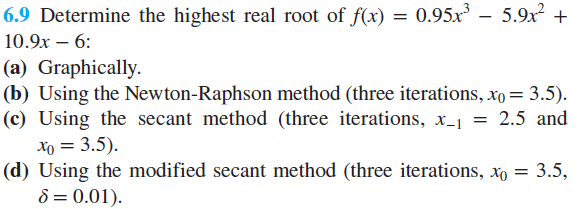

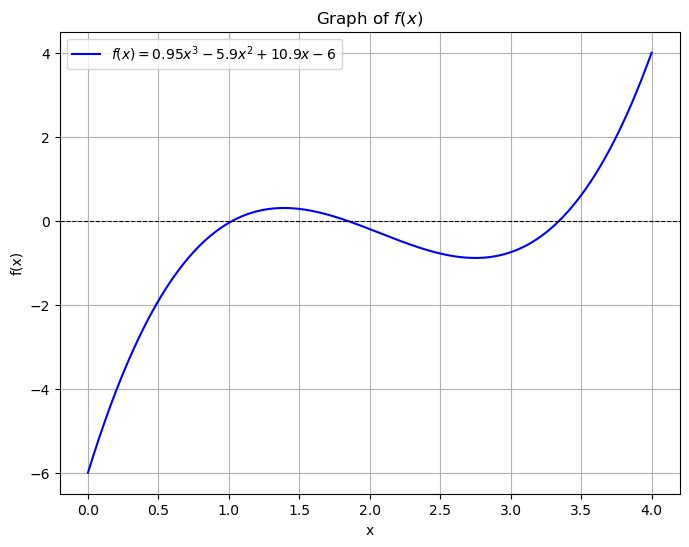

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return 0.95 * x**3 - 5.9 * x**2 + 10.9 * x - 6

# Generate x values over a range
x = np.linspace(0, 4, 500)  # Choose a range based on expected roots

# Calculate corresponding y values
y = f(x)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r"$f(x) = 0.95x^3 - 5.9x^2 + 10.9x - 6$", color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # x-axis
plt.title("Graph of $f(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend(loc="best")
plt.show()


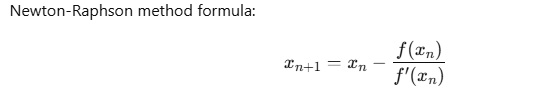

In [8]:
# Define the derivative of the function
def df(x):
    return 2.85 * x**2 - 11.8 * x + 10.9

# Newton-Raphson Method
def newton_raphson(func, dfunc, x0, iterations):
    x = x0
    for i in range(iterations):
        x = x - func(x) / dfunc(x)
        print(f"Iteration {i+1}: x = {x:.6f}")
    return x

# Initial guess
x0 = 3.5

# Perform three iterations
print("Newton-Raphson Method:")
root_newton = newton_raphson(f, df, x0, 3)
print(f"Approximate root after 3 iterations: {root_newton:.6f}")


Newton-Raphson Method:
Iteration 1: x = 3.365651
Iteration 2: x = 3.345112
Iteration 3: x = 3.344645
Approximate root after 3 iterations: 3.344645


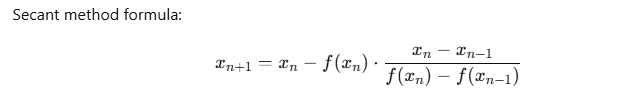

In [9]:
# Secant Method
def secant_method(func, x0, x1, iterations):
    for i in range(iterations):
        f_x0 = func(x0)
        f_x1 = func(x1)
        # Secant formula
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        print(f"Iteration {i+1}: x = {x2:.6f}")
        # Update for next iteration
        x0, x1 = x1, x2
    return x2

# Initial guesses
x_minus1 = 2.5
x0 = 3.5

# Perform three iterations
print("Secant Method:")
root_secant = secant_method(f, x_minus1, x0, 3)
print(f"Approximate root after 3 iterations: {root_secant:.6f}")


Secant Method:
Iteration 1: x = 3.063063
Iteration 2: x = 3.291906
Iteration 3: x = 3.367092
Approximate root after 3 iterations: 3.367092


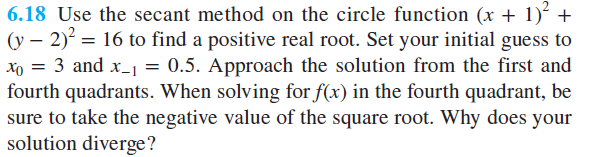

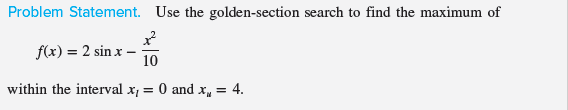

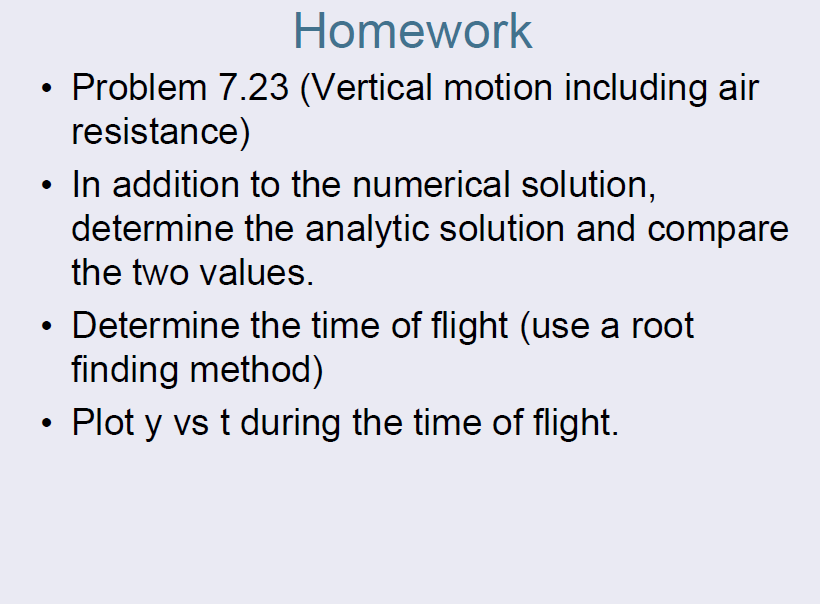

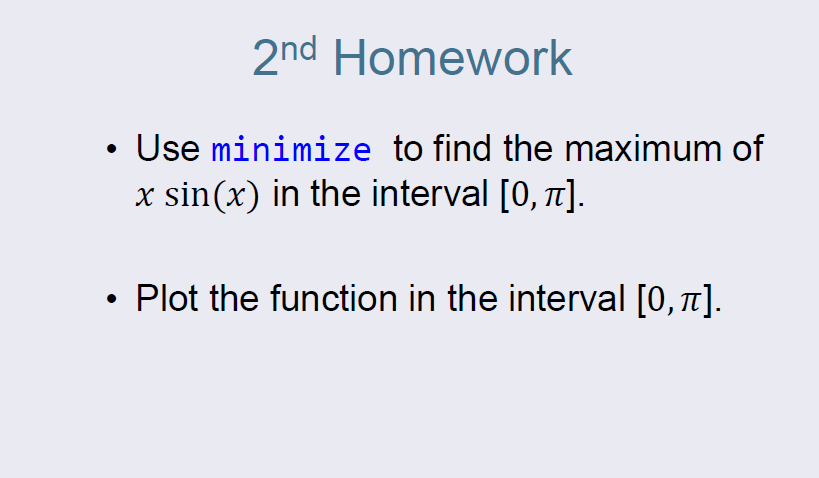